# Reto exploración avistamientos de OVNIs

![UFO](ovni.jpg)

### Importamos las librerías necesarias y leemos el csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Leemos el csv
df = pd.read_csv('dat/ufos.csv', encoding = "ISO-8859-1", sep = ',', error_bad_lines=False, dtype='unicode')



## 1. ¿Qué países aparecen en el dataset? ¿Cuál tiene mayor número de avistamientos?
Para averiguar qué países aparecen en el dataset y cuál tiene mayor número de avistamientos agrupamos por la columna country y contamos con count() cuantas veces aparece cada país.
Guardamos el resultado en un nuevo dataframe "df_countries" y lo ordenamos de menor a mayor número de avistamientos. 
#### Vemos que el que mayor número de avistamientos tiene es US - United States.

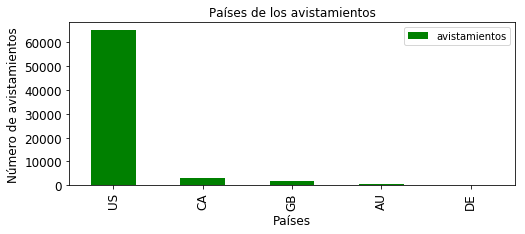

In [2]:
serie_countries = df.groupby(['country'])['country'].count()

df_countries = pd.DataFrame()
df_countries['avistamientos'] = serie_countries
df_countries = df_countries.sort_values(by='avistamientos', ascending=False)

df_countries.index = df_countries.index.map(str.upper)

ylabel_text = "Número de avistamientos"
a = df_countries['avistamientos'].plot(kind='bar', title = 'Países de los avistamientos', figsize=(8, 3), 
                                color = 'green', legend=True, fontsize=12)
a.set_xlabel("Países", fontsize=12)
a.set_ylabel(ylabel_text, fontsize=12)
plt.show()

## 2. ¿Cuáles son las 10 formas de OVNI avistadas más frecuentes (y cuál es esa frecuencia)?
Para obtener las 10 formas de OVNI más frecuentes agrupamos por la columna shape y contamos con count() cuantas veces aparece cada forma.
Guardamos el resultado en un nuevo dataframe "df_formas".
Para quedarnos con las 10 formas avistadas más frecuentes ordenamos el dataframe en orden descendente y nos quedamos con las 10 primeras filas.
#### Vemos que la forma más frecuente es light (luz).

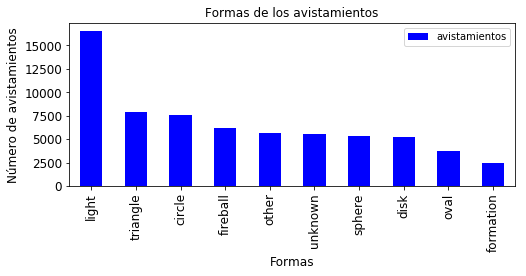

In [3]:
serie_formas = df.groupby(['shape'])['shape'].count()

df_formas = pd.DataFrame()
df_formas['avistamientos'] = serie_formas

df_formas = df_formas.sort_values(by='avistamientos', ascending=False)[:10]

ylabel_text = "Número de avistamientos"
b = df_formas['avistamientos'].plot(kind='bar', title = 'Formas de los avistamientos', figsize=(8, 3), 
                                    color = 'blue', legend=True, fontsize=12)
b.set_xlabel("Formas", fontsize=12)
b.set_ylabel(ylabel_text, fontsize=12)
plt.show()


## 3. ¿Cómo se distribuye la duración de los avistamientos? 

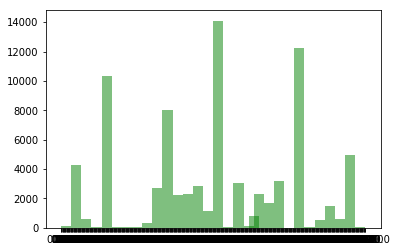

In [4]:
df['duration (seconds)'] = pd.to_numeric(df['duration (seconds)'] , errors='coerce')

df_duracion = pd.DataFrame()
df_duracion['duracion'] = df['duration (seconds)'].dropna()

plt.hist(df_duracion, bins = 30, facecolor='green', alpha=0.5) 
plt.show()


## 4.¿Cómo se distribuye el tiempo pasado entre el momento del avistamiento (datetime) y la fecha de publicación (date_posted)?



Para conocer el tiempo transcurrido entre el avistamiento y la fecha de publicación pasamos a formato fecha las columna correspondientes "date_posted" y "datetime". Restamos a la columna "date_posted" la columna "datetime" y lo pasamos a días. Después igualamos a 0 los valores negativos(1) y por último mostramos la columna resultado en un histograma eliminando a la vez los valores nulos.

1. Al restar la columna "datetime" que tiene formato DDMMYYYY a la columna "date_posted" que contiene horas y minutos además de la fecha (DDMMYYYY HH:MM) se producen valores negativos cuando las fechas coinciden en el mismo día.


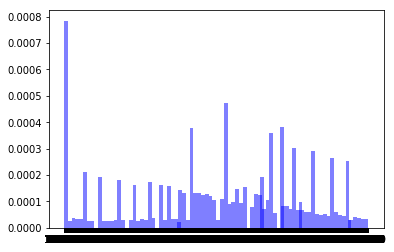

In [5]:
df['date posted'] = pd.to_datetime(df['date posted'], errors='coerce')
df['datetime'] = pd.to_datetime(df['datetime'] , errors='coerce')

df['tiempo_publi'] = (df['date posted'] - df['datetime']).dt.days
df[df['tiempo_publi']< 0] = 0

df_tiempo_publi = pd.DataFrame()
df['tiempo_publi'] = pd.to_numeric(df['tiempo_publi'] , errors='coerce')
df_tiempo_publi['tiempo_publi'] = df['tiempo_publi'].dropna()

plt.hist(df_tiempo_publi, bins = 80, normed=True, facecolor='blue', alpha=0.5) 
plt.show()

## 5 ¿Se observa un crecimiento o decrecimiento de los avistamientos a lo largo del tiempo?

Para saber si ha habido un crecimiento o decrecimiento de avistamientos tratamos los datos para obtenemos dos columnas, una con los años en los que se producen avistamientos y otra con el número de avistamientos por año.
Ordenamos los datos por año en orden descendente y los mostramos en un gráfico.
#### Podemos ver que se produce un crecimiento de los avistamientos a lo largo de los años hasta el año 2012 que se produce el número más alto. A partir de 2012 se observa un decrecimiento.

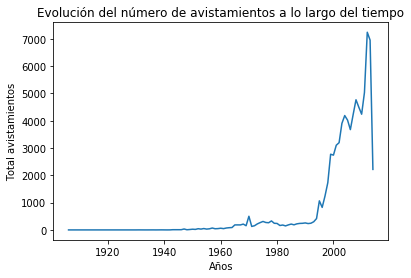

In [6]:
df['year'] = df['datetime'].dt.year

serie_years = df.groupby(['year'])['year'].count()

df_years = pd.DataFrame()
df_years['avistamientos'] = serie_years
df_years = df_years.reset_index()

df_years = df_years.sort_values(by='year', ascending=False)

x = df_years['year']
y = df_years['avistamientos']

plt.xlabel('Años')
plt.ylabel('Total avistamientos')
plt.title('Evolución del número de avistamientos a lo largo del tiempo')
plt.plot(x,y)
plt.show()